<a href="https://colab.research.google.com/github/gonzo1978/CAP4453/blob/main/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


Original Image


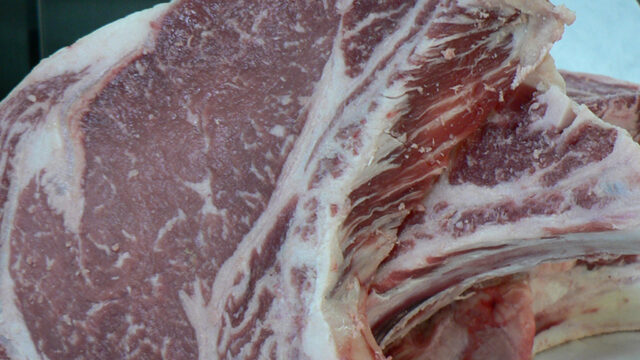

3x3 Filtered


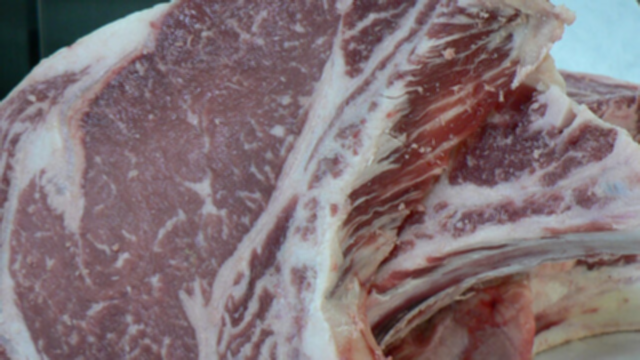

5x5 Filtered


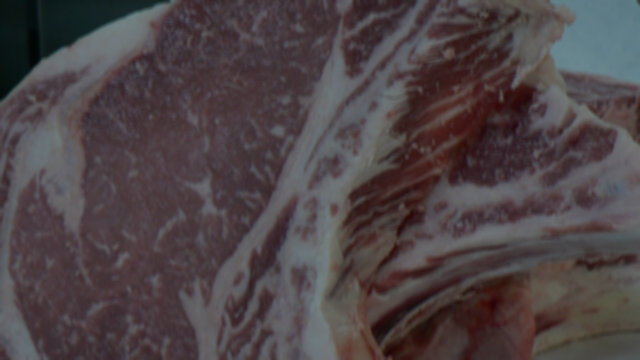

In [1]:

import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
yourUrl = 'https://baconmockup.com/640/360'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#prepare the 3x3 shaped filter
#k1 = np.array([[],[],[]])
k1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

#prepare the 5x5 shaped filter
#k2 = np.array([[],[],[],[],[]])
k2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]])
# Normalize the kernels if needed. 3x3 filter has 1/9 factor, 5x5 has a 1/25 factor
k1 = k1 / 9
k2 = k2 / 25
# apply filter
#final_frame = cv2.filter2D()

final_frame_3x3 = cv.filter2D(image, -1, k1)
final_frame_5x5 = cv.filter2D(image, -1, k2)


# visualize
#cv2_imshow(final_frame)
print("Original Image")
cv2_imshow(image)
print("3x3 Filtered")
cv2_imshow(final_frame_3x3)
print("5x5 Filtered")
cv2_imshow(final_frame_5x5)


Box Filter Comparison:
The main difference betweeen the 3x3 and 5x5 filtered images is that the 5x5 is noticably darker. Specifically, a box filter goes pixel by pixel and takes an average of the surrounding pixels. It also seems as though the two images have a sort of blurring effect.

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





3x3 Kernel: 
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
5x5 Kernel: 
[[0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.02940561 0.08333362 0.11792801 0.08333362 0.02940561]
 [0.02077942 0.05888756 0.08333362 0.05888756 0.02077942]
 [0.00733235 0.02077942 0.02940561 0.02077942 0.00733235]]
9x9 Kernel: 
[[0.00012104 0.00047501 0.00126131 0.00226616 0.00275495 0.00226616
  0.00126131 0.00047501 0.00012104]
 [0.00047501 0.00186409 0.00494975 0.00889309 0.01081125 0.00889309
  0.00494975 0.00186409 0.00047501]
 [0.00126131 0.00494975 0.01314314 0.02361394 0.02870725 0.02361394
  0.01314314 0.00494975 0.00126131]
 [0.00226616 0.00889309 0.02361394 0.04242656 0.05157759 0.04242656
  0.02361394 0.00889309 0.00226616]
 [0.00275495 0.01081125 0.02870725 0.05157759 0.0627024  0.05157759
  0.02870725 0.01081125 0.00275495]
 [0.00226616 0.00889309 0.02361394 0.0424

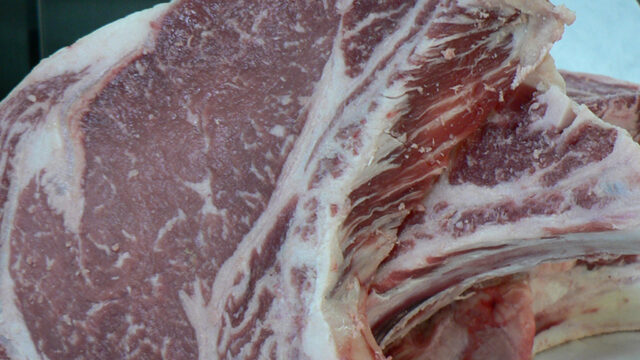

3x3 Gaussian Filtered: 


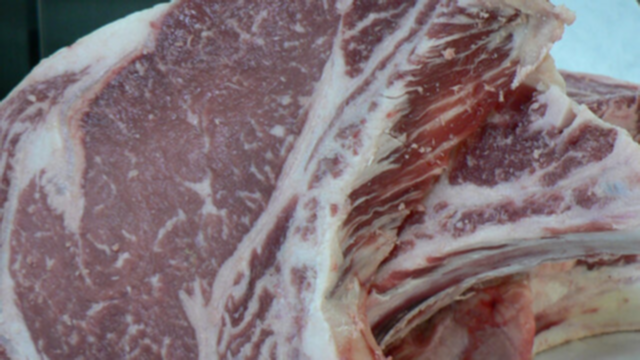

5x5 Gaussian Filtered: 


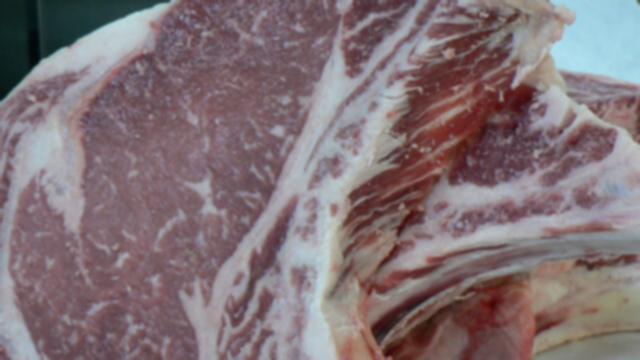

9x9 Gaussian Filtered


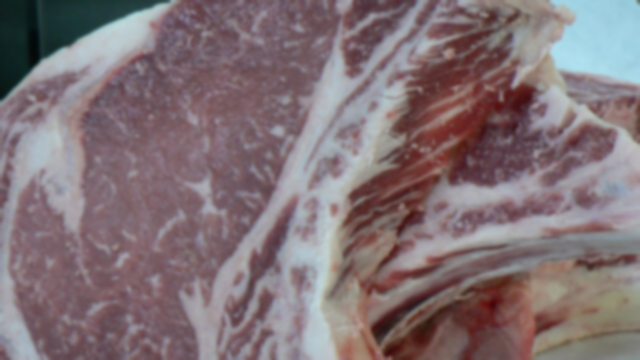

In [6]:
#add your code here

# A possible implementation is here. Modify it play with it:
#
import numpy as np
def gkrn(l=3, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

kernel_3 = gkrn(3, 1.0)
kernel_5 = gkrn(5, 1.2)
kernel_9 = gkrn(9, 1.6)
print("3x3 Kernel: ")
gaussian_3x3 = cv.filter2D(image, -1, kernel_3)
print(kernel_3)
print("5x5 Kernel: ")
gaussian_5x5 = cv.filter2D(image, -1, kernel_5)
print(kernel_5)
print("9x9 Kernel: ")
gaussian_9x9 = cv.filter2D(image, -1, kernel_9)
print(kernel_9)

print("Original Image: ")
cv2_imshow(image)
print("3x3 Gaussian Filtered: ")
cv2_imshow(gaussian_3x3)
print("5x5 Gaussian Filtered: ")
cv2_imshow(gaussian_5x5)
print("9x9 Gaussian Filtered: ")
cv2_imshow(gaussian_9x9)

4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

After running the three Gaussian kernels, I notice that they create a varying amount of blur to the image. As the kernel size and the Sigma increased, the image became more blurred. It seems as though Gaussian filters are most adept at blurring an image compared to a box filter.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



Threshold_1 = 20


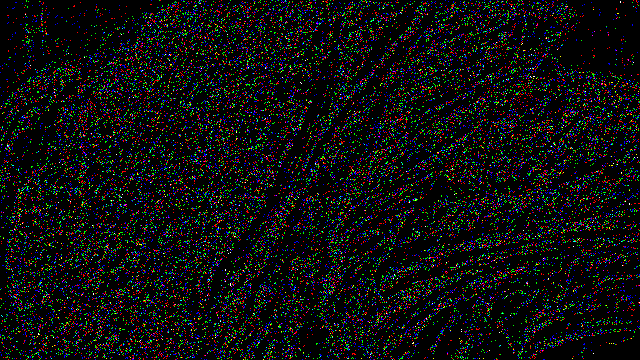

Threshold_2 = 10


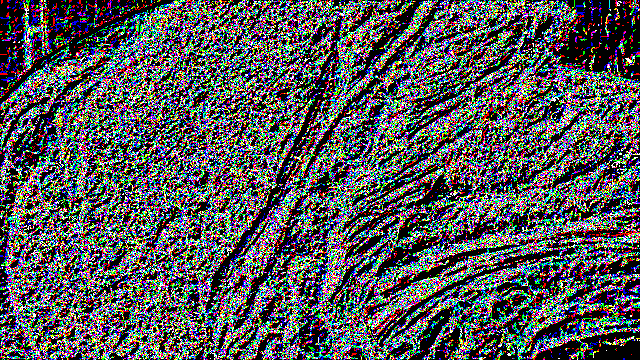

Threshold_3 = 5


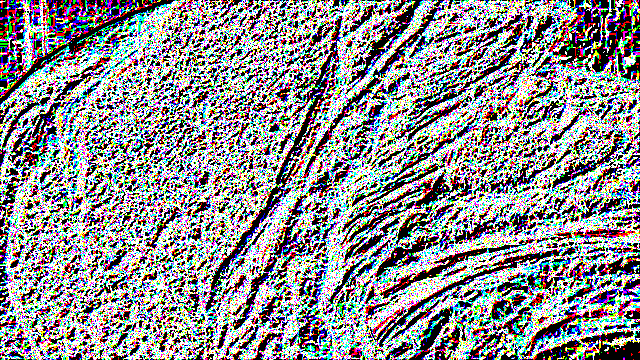

In [13]:
# step 1. Get x and y gradients . Use the correct kernels
x_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
x_grad = cv.filter2D(image, -1, x_kernel)
y_grad = cv.filter2D(image, -1, y_kernel)
#cv2.filter2D()

# step 2. Compute the magnitude of the gradient
magnitude = np.sqrt((x_grad ** 2) + (y_grad ** 2))
# Step 3. Threshold. Choose 3 different threshold. visualize outputs
threshold_1 = 15
threshold_2 = 10
threshold_3 = 5
img1 = (magnitude > threshold_1) * 255
img2 = (magnitude > threshold_2) * 255
img3 = (magnitude > threshold_3) * 255

print("Threshold_1 = 20")
cv2_imshow(img1)
print("Threshold_2 = 10")
cv2_imshow(img2)
print("Threshold_3 = 5")
cv2_imshow(img3)

It seems as though that a threshold limits how many pixels are allowed to be shown in the resulting image. If the threshold is too high (such as 20), then the image will be all black.


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


Threshold 10-15


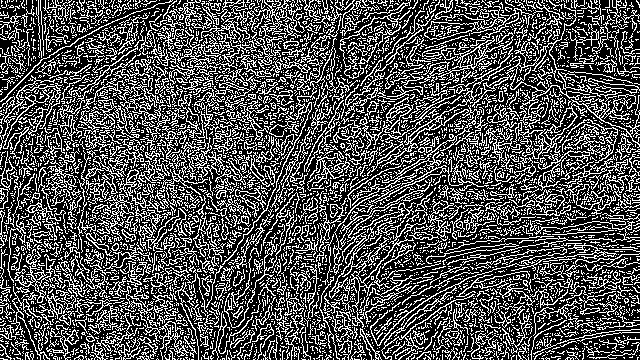

Threshold 50-100


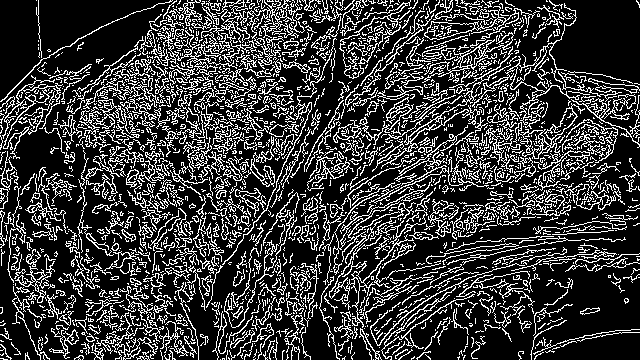

Threshold 100-150


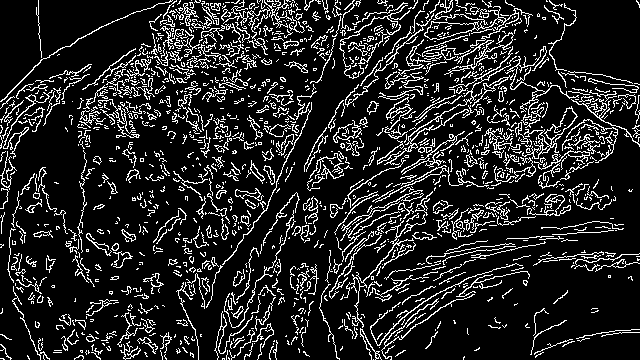

In [14]:
# use the canny from openCV
# cv.Canny(	image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	)
print("Threshold 10-15")
cv2_imshow(cv.Canny(image, 10, 15))
print("Threshold 50-100")
cv2_imshow(cv.Canny(image, 50, 100))
print("Threshold 100-150")
cv2_imshow(cv.Canny(image, 100, 150))


I can see that the higher the threshold, the more limited the edge detection is. For example, the 10-15 threshold left a lot of edges on but the 150-200 threshold left significantly less edges.

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


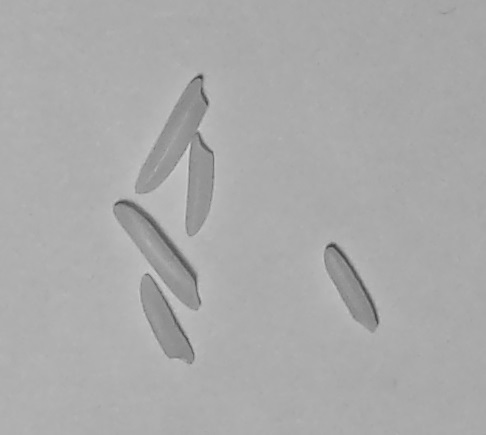

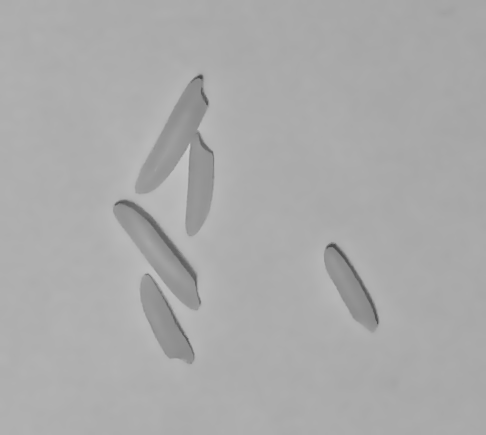

In [19]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = io.imread('https://i.stack.imgur.com/pgWt1.jpg')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# utilize cvtColor to convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 11
sigma_color_space = 17
sigma_spatial_space = 5
gray = cv2.bilateralFilter(gray, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray)




8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

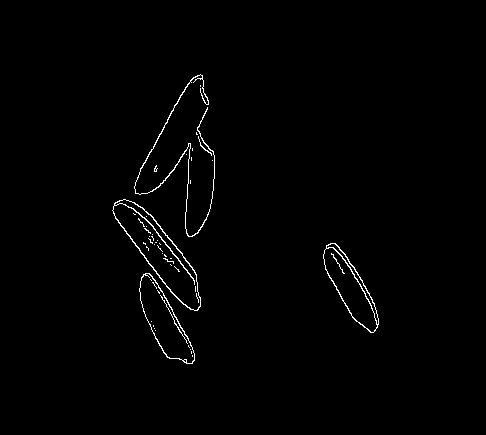

In [20]:
# use the canny from openCV
# threshold1 =
# threshold2 =
#edges = cv2.Canny(	gray, threshold1, threshold2)
threshold1 = 20
threshold2 = 25
edges = cv.Canny(gray, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


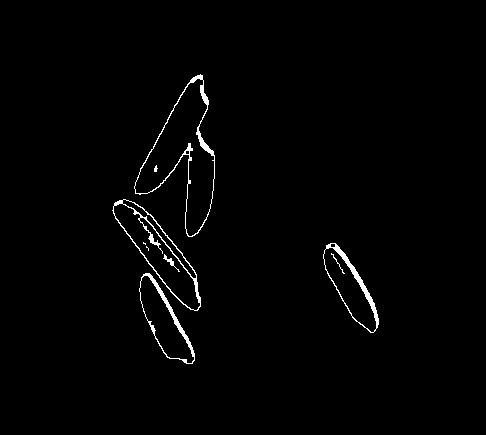

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

A total of 4 grains were found
1


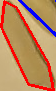

2


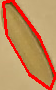

3


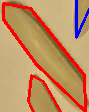

4


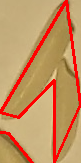

the grains


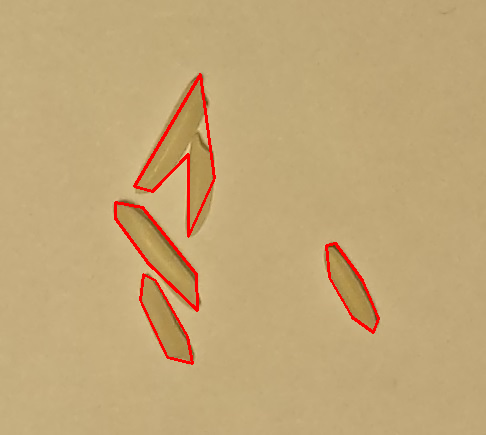

In [25]:
i=0
cnts,heir= cv.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")

for c in cnts:
	peri = cv2.arcLength(c, True)
  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
